In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

<h1>MSE</h1>

In [2]:
def cost_function(X, y, w): 
     return np.mean((X.dot(w) - y) ** 2)

<h1>BatchGradientDescent</h1>

In [88]:
def gradient_descent_batch(X, y, w, learning_rate, iterations): 
    m = len(y) 
    costs = [] 
    for _ in range(iterations): 
        gradient = X.T.dot(X.dot(w) - y) / m 
        w -= learning_rate * gradient 
        costs.append(cost_function(X, y, w)) 
    return w, costs

<h1>Stochastic Gradient Descent</h1>

In [89]:
def gradient_descent_stochastic(X, y, w, learning_rate, iterations): 
    m = len(y) 
    costs = [] 
    for _ in range(iterations): 
        for i in range(m): 
            random_index = np.random.randint(m) 
            X_i = X[random_index:random_index + 1] 
            y_i = y[random_index:random_index + 1] 
            gradient = X_i.T.dot(X_i.dot(w) - y_i) 
            w -= learning_rate * gradient 
        costs.append(cost_function(X, y, w))
     
    return w, costs

<h1>Mini-Batch Gradient Descent</h1>

In [90]:
def gradient_descent_mini_batch(X, y, w, learning_rate, iterations, batch_size): 
    m = len(y) 
    costs = [] 
    for _ in range(iterations): 
        indices = np.random.permutation(m) 
        X_shuffled = X[indices] 
        y_shuffled = y[indices] 
        for i in range(0, m, batch_size): 
            X_batch = X_shuffled[i:i + batch_size] 
            y_batch = y_shuffled[i:i + batch_size] 
            gradient = X_batch.T.dot(X_batch.dot(w) - y_batch) / batch_size 
            w -= learning_rate * gradient 
        costs.append(cost_function(X, y, w)) 
    return w, costs

<h1> داده ها</h1>

In [91]:
cancerch = datasets.load_breast_cancer() 
X = np.c_[np.ones((cancerch.data.shape[0], 1)), cancerch.data]
y = cancerch.target.reshape(-1, 1)

In [92]:
# مقیاس‌بندی داده‌ها
scaler = StandardScaler() 
X = scaler.fit_transform(X)

<h1>تنظیم پارامترها</h1>

In [93]:
learning_rate = 0.001 
iterations = 500
batch_size = 32

<h1>اجرای گرادیان نزولی </h1>

In [94]:
# Batch 
w_batch = np.random.randn(X.shape[1], 1) 
start_time = time.time() 
w_batch, costs_batch = gradient_descent_batch(X, y, w_batch, learning_rate, iterations) 
batch_time = time.time() - start_time

# گرادیان نزولی Stochastic 
w_stochastic = np.random.randn(X.shape[1], 1) 
start_time = time.time() 
w_stochastic, costs_stochastic = gradient_descent_stochastic(X, y, w_stochastic, learning_rate, iterations) 
stochastic_time = time.time() - start_time

# گرادیان نزولی Mini-Batch 
w_mini_batch = np.random.randn(X.shape[1], 1) 
start_time = time.time() 
w_mini_batch, costs_mini_batch = gradient_descent_mini_batch(X, y, w_mini_batch, learning_rate, iterations, batch_size) 
mini_batch_time = time.time() - start_time

In [95]:
print("Batch Gradient Descent:") 
print("Final weights:", w_batch.ravel()) 
print("Final cost:", costs_batch[-1])

print("\nStochastic Gradient Descent:") 
print("Final weights:", w_stochastic.ravel()) 
print("Final cost:", costs_stochastic[-1])
 
print("\nMini-Batch Gradient Descent:") 
print("Final weights:", w_mini_batch.ravel()) 
print("Final cost:", costs_mini_batch[-1])

Batch Gradient Descent:
Final weights: [-2.347243    1.5204845   0.33519494  1.82567743  0.38255708  0.47114616
  0.09837893 -0.51737843 -0.0604477  -0.00655587  0.38360873 -1.69279298
  0.15987184  0.10567962  1.11922193  0.43754017 -1.2370589   1.76623023
 -0.23594717 -1.27952453  0.44291273 -0.90899741  0.55821456 -1.61922984
 -0.62313904 -0.39920798  0.58121437 -1.44529372 -0.17524086  0.50541171
  0.44255457]
Final cost: 3.284969841069369

Stochastic Gradient Descent:
Final weights: [-1.76638670e+00  1.01030888e-01  3.11818648e-03 -7.45516930e-01
  5.77459966e-01 -1.39867275e-03  2.69306255e-01 -1.78927092e-01
 -4.12576400e-02  8.00881674e-03 -1.94719695e-02 -9.80872154e-02
  3.30807447e-02 -1.56443757e-01  1.92587195e-01 -3.75468871e-02
  2.80555728e-03  9.29973742e-02 -4.07777424e-02  2.77102589e-03
  3.03725741e-02 -5.75667350e-01 -5.70177277e-02  5.48955069e-01
 -6.61169594e-02 -2.48612758e-02 -6.27690331e-02 -4.20730546e-02
 -8.92839411e-02 -3.18289532e-02 -9.05031755e-02]
Fi

<h1>نمودارها</h1>

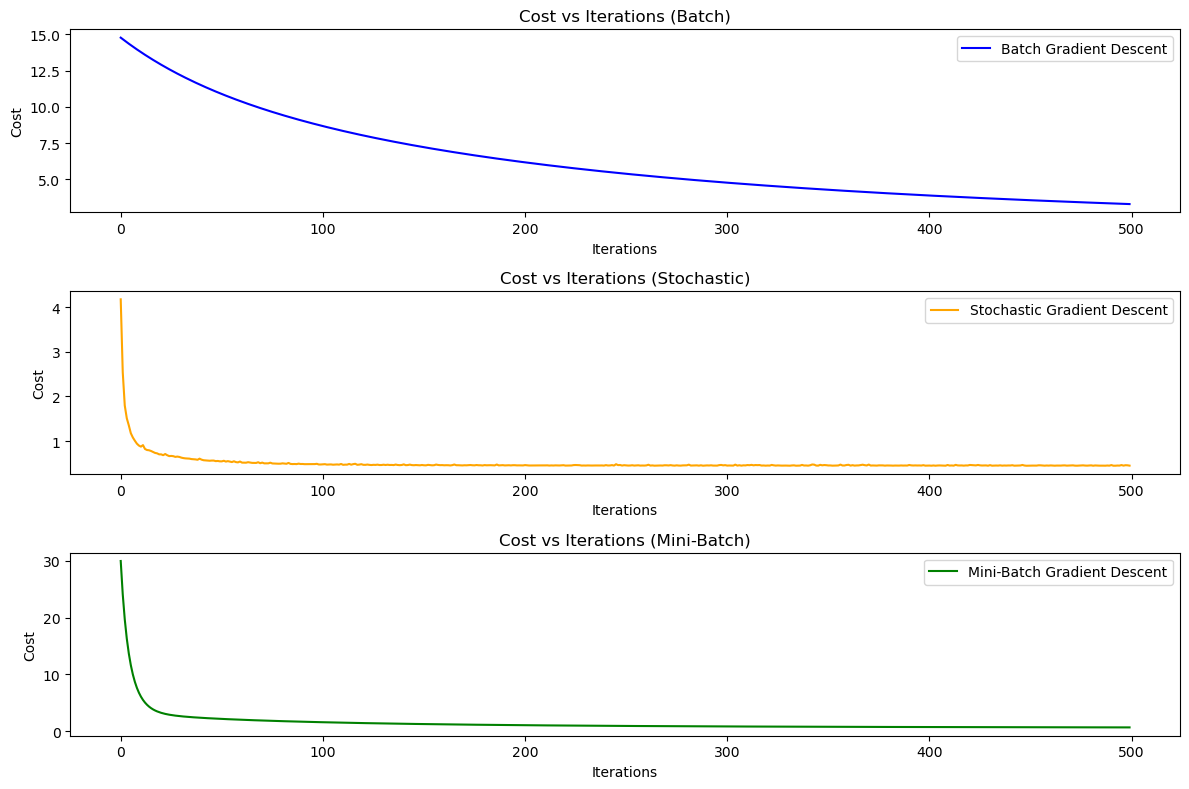

In [96]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1) 
plt.plot(costs_batch, label='Batch Gradient Descent', color='blue') 
plt.title('Cost vs Iterations (Batch)') 
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.legend()

plt.subplot(3, 1, 2) 
plt.plot(costs_stochastic, label='Stochastic Gradient Descent', color='orange') 
plt.title('Cost vs Iterations (Stochastic)') 
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.legend()

plt.subplot(3, 1, 3) 
plt.plot(costs_mini_batch, label='Mini-Batch Gradient Descent', color='green') 
plt.title('Cost vs Iterations (Mini-Batch)') 
plt.xlabel('Iterations') 
plt.ylabel('Cost') 
plt.legend()

plt.tight_layout() 
plt.show()